## Paso 1. Acceda los datos y prepáralos para el análisis

In [1]:
#Cargamos primero las librerías que vamos a utilizar en todo el proyecto
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
visits = pd.read_csv('/datasets/visits_log_us.csv')
orders = pd.read_csv('/datasets/orders_log_us.csv')
costs = pd.read_csv('/datasets/costs_us.csv')

In [3]:
print(visits.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None


In [4]:
print(orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None


In [5]:
print(costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None


#### Pasamos todos los encabezados a minúsculas y quitamos espacios

In [6]:
visits.columns = visits.columns.str.strip().str.lower().str.replace(' ', '_')
orders.columns = orders.columns.str.strip().str.lower().str.replace(' ', '_')
costs.columns = costs.columns.str.strip().str.lower().str.replace(' ', '_')

In [7]:
print(visits.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   device     359400 non-null  object
 1   end_ts     359400 non-null  object
 2   source_id  359400 non-null  int64 
 3   start_ts   359400 non-null  object
 4   uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None


In [8]:
print(orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   buy_ts   50415 non-null  object 
 1   revenue  50415 non-null  float64
 2   uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None


In [9]:
print(costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None


#### Convertimos las fechas a formato datetime

In [10]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])

In [11]:
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])

In [12]:
costs['dt'] = pd.to_datetime(costs['dt'])

#### Volvemos los ID a formato string

In [13]:
visits['uid'] = visits['uid'].astype(str)
visits['source_id'] = visits['source_id'].astype(str)

In [14]:
orders['uid'] = orders['uid'].astype(str)

In [15]:
costs['source_id'] = costs['source_id'].astype(str)

#### Creamos columnas necesarias

In [16]:
visits['date'] = visits['start_ts'].dt.date

In [17]:
orders['date'] = orders['buy_ts'].dt.date

## Paso 2. Haz informes y calcula métricas 

### VISITAS

### ¿Cuántas personas lo usan cada día, semana y mes?

In [18]:
# Agregamos una columna 'date' para poder contar por día y no por segundos o minutos. Agrupamos por día, desde la fecha de inicio, contando por usuario único
users_per_day = visits.groupby('date').agg({'uid': 'nunique'}).reset_index()
users_per_day.columns = ['date', 'unique_users']
print(users_per_day.head())

         date  unique_users
0  2017-06-01           605
1  2017-06-02           608
2  2017-06-03           445
3  2017-06-04           476
4  2017-06-05           820


Decidí no hacer gráfico para visualizar por día ya que no es apropiado para nuestro análisis, ya que no se puede observar una tendencia clara.

In [19]:
# Agrupamos por semana, desde la fecha de inicio, contando por usuario único
users_per_week = visits.groupby(visits['start_ts'].dt.to_period('W')).agg({'uid': 'nunique'}).reset_index()
users_per_week.columns = ['week', 'unique_users']
print(users_per_week.head())

                    week  unique_users
0  2017-05-29/2017-06-04          2021
1  2017-06-05/2017-06-11          4129
2  2017-06-12/2017-06-18          2812
3  2017-06-19/2017-06-25          2878
4  2017-06-26/2017-07-02          3064


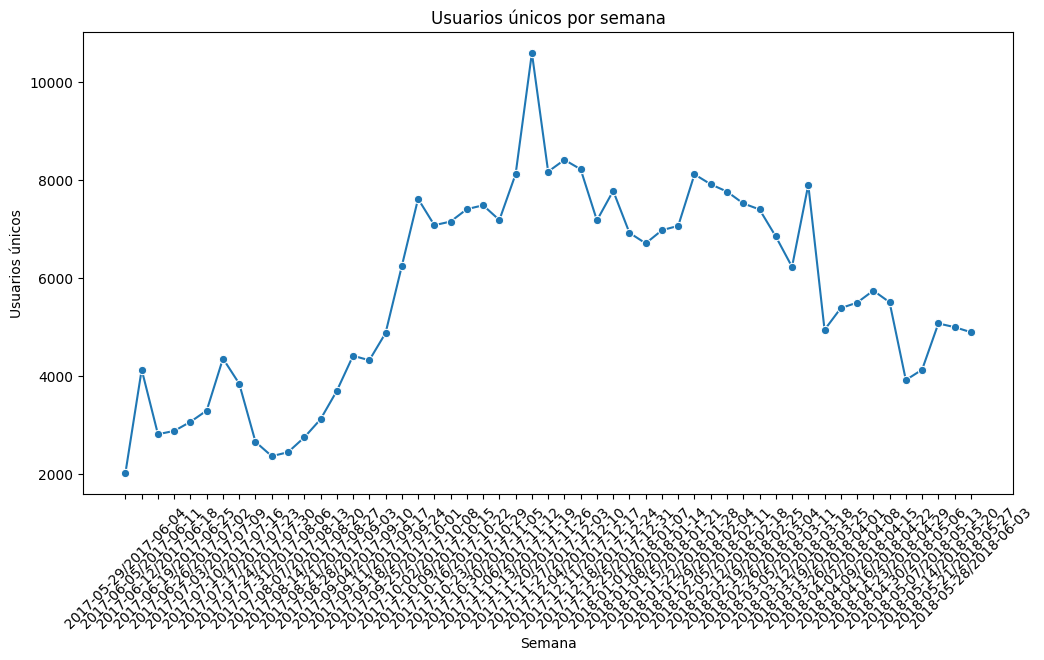

In [20]:
# Creamos el gráfico semanal
plt.figure(figsize=(12,6))
sns.lineplot(x=users_per_week['week'].astype(str), y=users_per_week['unique_users'], marker='o')
plt.title('Usuarios únicos por semana')
plt.xlabel('Semana')
plt.ylabel('Usuarios únicos')
plt.xticks(rotation=45)
plt.show()

En nuestro gráfico semanal podemos identificar algo de estacionalidad en la utilización de la página de Showz. Cada que va terminando el mes (la penúltima semana) hay un pico leve de aumento en su uso. Podemos entrar a ver con el gráfico mensual si esto se identifica más facilmente. No sabemos si se deba a que la gente reciba sus ingresos más o menos para esta época y tomen sus decisiones de compra en estos períodos o si se deba a que los shows se publican más que todo en estas épocas del mes.

In [21]:
# Agrupamos por mes, desde la fecha de inicio, contando por usuario único
users_per_month = visits.groupby(visits['start_ts'].dt.to_period('M')).agg({'uid': 'nunique'}).reset_index()
users_per_month.columns = ['month', 'unique_users']
print(users_per_month.head())

     month  unique_users
0  2017-06         13259
1  2017-07         14183
2  2017-08         11631
3  2017-09         18975
4  2017-10         29692


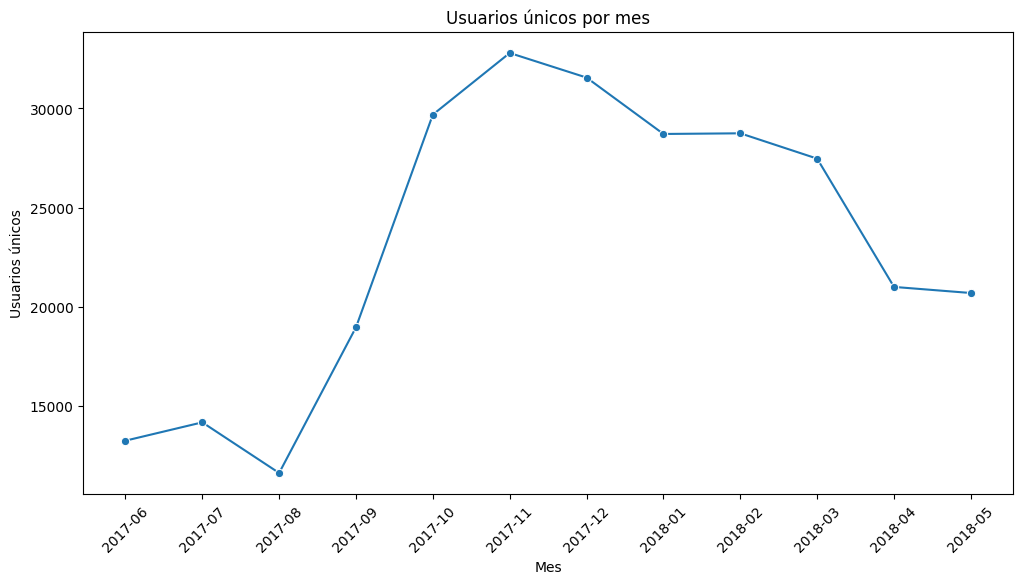

In [22]:
# Creamos el gráfico mensual
plt.figure(figsize=(12,6))
sns.lineplot(x=users_per_month['month'].astype(str), y=users_per_month['unique_users'], marker='o')
plt.title('Usuarios únicos por mes')
plt.xlabel('Mes')
plt.ylabel('Usuarios únicos')
plt.xticks(rotation=45)
plt.show()

En nuestro gráfico mensual vemos que hay una curva pronunciada de aumento en el uso de la página de Showz. Puede deberse a que los tipos de espectáculos publicados sean más interesantes y que haya una gran demanda por ellos. Lo interesante es que el pico más alto se produce en noviembre, lo cual deberíamos entrar a revisar si es porque la gente está más interesada en adquirir entradas para espectáculos de fin de año, como los navideños.

A pesar de que la curva va bajando después de noviembre, el uso de la página sigue siendo alto hasta marzo y presenta un descenso en meses posteriores. Debemos intentar ver qué tipos de espectáculos hacen que durante el periodo de septiempre a mayo haga que la gente visite más la página.

### ¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión)

In [23]:
# Agrupamos por fecha y contamos las sesiones por usuario.
sessions_per_day = visits.groupby('date')['uid'].count().reset_index()
print(sessions_per_day.head())

         date  uid
0  2017-06-01  664
1  2017-06-02  658
2  2017-06-03  477
3  2017-06-04  510
4  2017-06-05  893


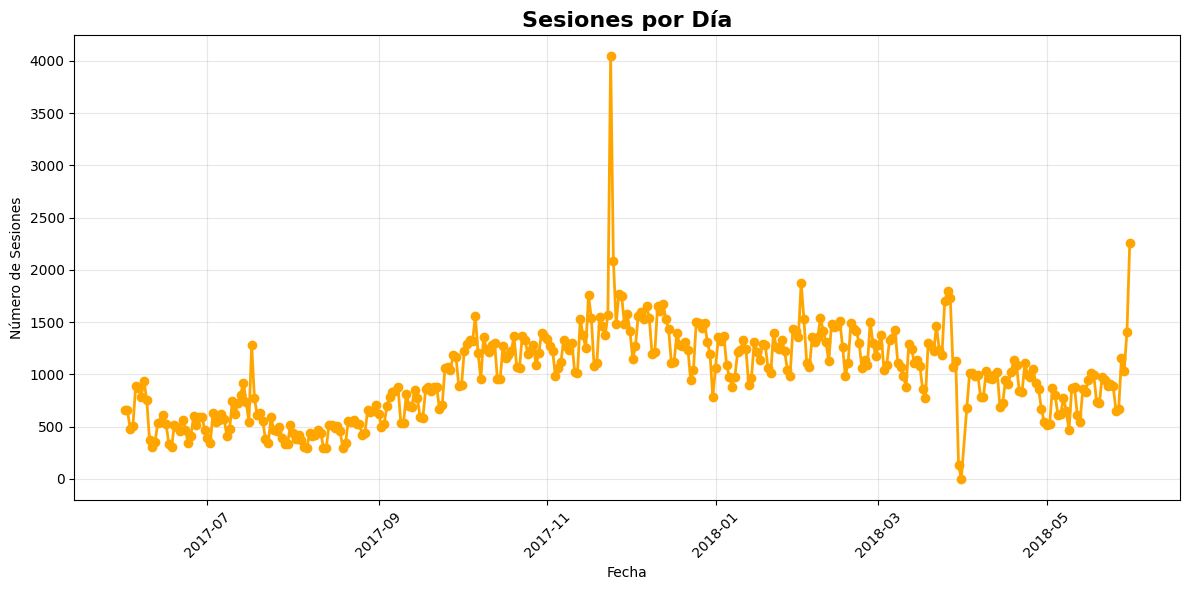

In [24]:
# Graficamos las sesiones por día.
plt.figure(figsize=(12, 6))
plt.plot(sessions_per_day['date'], sessions_per_day['uid'], marker='o', linewidth=2, color='orange')
plt.title('Sesiones por Día', fontsize=16, fontweight='bold')
plt.xlabel('Fecha')
plt.ylabel('Número de Sesiones')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [25]:
# Sacamos el promedio de sesiones por día.
print(sessions_per_day['uid'].mean())

987.3626373626373


En nuestro gráfico es dificil visualizar el comprotamiento de los datos. 

Sin embargo, revisando el promedio de sesiones por día por usuario es de alrededor 987. Debemos entrar a revisar los picos que se generan en ciertos días para poder determinar si es una cuestiosn de estacionalidad (que la gente prefiera conectarse mayormente los fines de semana) o si es que hay espectáculos que son más interesantes y demandados que otros.

### ¿Cuál es la duración de cada sesión?

In [26]:
# Buscamos la duración en minutos porque la aplicación no cuenta los segundos
visits['session_duration'] = (visits['end_ts'] - visits['start_ts']).dt.total_seconds()/60
print(visits.head())

    device              end_ts source_id            start_ts  \
0    touch 2017-12-20 17:38:00         4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00         2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00         5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00         9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00         3 2017-12-27 14:06:00   

                    uid        date  session_duration  
0  16879256277535980062  2017-12-20              18.0  
1    104060357244891740  2018-02-19              28.0  
2   7459035603376831527  2017-07-01               0.0  
3  16174680259334210214  2018-05-20              24.0  
4   9969694820036681168  2017-12-27               0.0  


In [27]:
# Hay dos registros de duración que desconocemos por qué dan negativos, así que vamos a filtrar lo que sean mayores a 0.
visits = visits[visits['session_duration'] > 0]

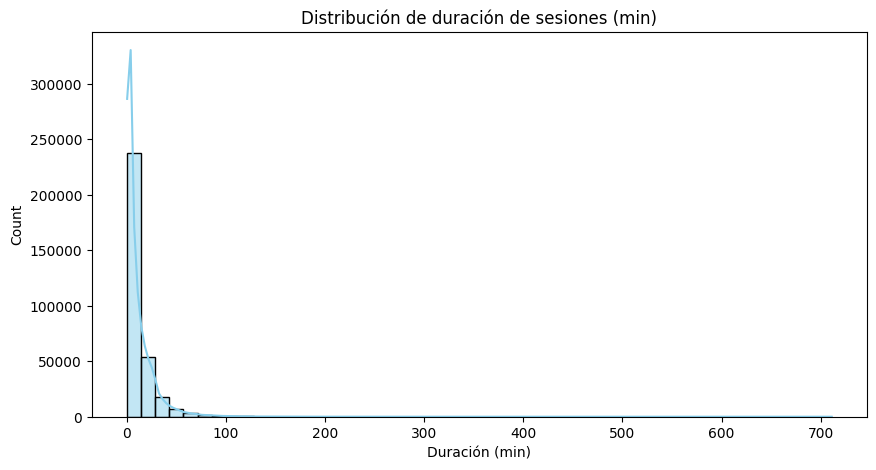

In [28]:
# Creamos un histograma donde nos muestre la duración de las sesiones.
plt.figure(figsize=(10,5))
sns.histplot(visits['session_duration'], bins=50, kde=True, color='skyblue')
plt.title('Distribución de duración de sesiones (min)')
plt.xlabel('Duración (min)')
plt.show()

In [29]:
# Para completar nuestra visualización, sacamos las estadísticas.
print(visits['session_duration'].describe())

count    323604.000000
mean         11.902825
std          17.105824
min           0.316667
25%           2.000000
50%           6.000000
75%          15.000000
max         711.000000
Name: session_duration, dtype: float64


Revisando nuestras estadísticas podemos decir que el promedio de duración de cada sesión es de aproximadamente 12 minutos. La mayoría de los usuarios tardan hasta 15 minutos visitando la página. Sin embargo, cuando revisamos nuestras estadísticas más minuciosamente, hay mucha diferencia entre el máximo y mínimo de tiempo de visita, lo que no nos permite determinar bien qué hace que los usuarios tengan este comportamiento. Podríamos entrar a ver cómo sería el comportamiento por dispositivo de escritorio o movil a ver si hay diferencias.

In [30]:
visits.groupby('device')['session_duration'].median()

device
desktop    7.0
touch      4.0
Name: session_duration, dtype: float64

<Figure size 1200x600 with 0 Axes>

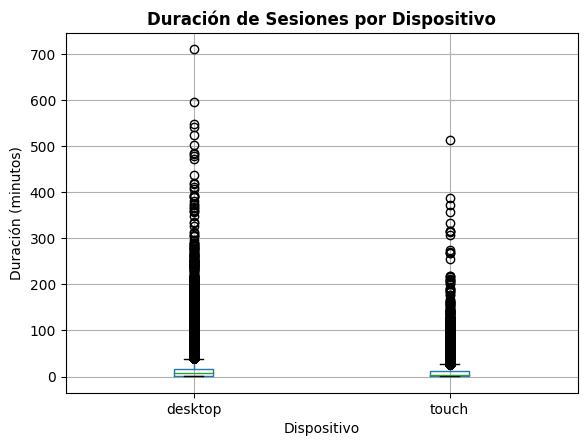

In [31]:
# También podemos revisar la duraciones de las sesiones por dispositivo.
plt.figure(figsize=(12, 6))
visits.boxplot(column='session_duration', by='device')
plt.title('Duración de Sesiones por Dispositivo', fontsize=12, fontweight='bold')
plt.xlabel('Dispositivo')
plt.ylabel('Duración (minutos)')
plt.suptitle('')
plt.show()

Podemos darnos cuenta, por las estadísticas de la duración de la sesión por dispositivo, que El 75% de las sesiones dura menos de 15 minutos. Los usuarios permanecen más en los dispositivos desktop que en tipo touch. Esto puede deberse a que, tal vez, la navegabilidad en dispositivos touch no sea tan amigable y tocaría empezar a revisar de qué manera se puede mejorar este aspecto.

### ¿Con qué frecuencia los usuarios regresan?

In [32]:
# Ordenamos nuestro dataset por usuario y fecha
visits = visits.sort_values(by=['uid', 'start_ts'])

In [33]:
# Ahora, queremos calcular el tiempo entre sesiones del mismo usuario
visits['prev_session_end'] = visits.groupby('uid')['start_ts'].shift(1)
visits['days_since_last_session'] = (visits['start_ts'] - visits['prev_session_end']).dt.days

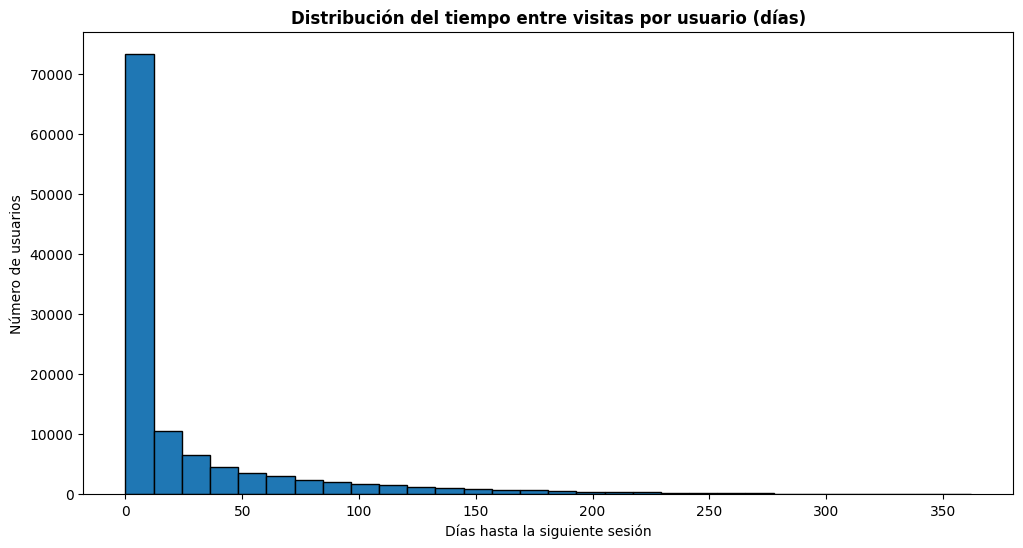

In [34]:
# Finalmente, queremos ver cómo se distribuye este comportamiento en el tiempo
plt.figure(figsize=(12, 6))
plt.hist(visits['days_since_last_session'], bins=30, edgecolor='black')
plt.title('Distribución del tiempo entre visitas por usuario (días)', fontsize=12, fontweight='bold')
plt.xlabel('Días hasta la siguiente sesión')
plt.ylabel('Número de usuarios')
plt.show()

Esto nos permite ver que la mayoría de los usuarios regresan rápidamente dentro de los primeros 5 días y, luego, disminuye drásticamente después del primer mes. Esto puede deberse a que las personas se toman un tiempo (unos días) para considerar su compra, y como son espectáculos, no es un tema recurrente, entonces disminuye drásticamente después de la primera semana.

### VENTAS

### ¿Cuándo empieza la gente a comprar?

In [35]:
# Debemos agrupar por usuario para ver la primera fecha de visita y fecha de orden.
first_visits = visits.groupby('uid', as_index=False)['start_ts'].min().rename(columns={'start_ts':'first_visit'})
first_orders = orders.groupby('uid', as_index=False)['buy_ts'].min().rename(columns={'buy_ts':'first_order'})

In [36]:
# Como queremos saber el tiempo de conversión de los usuarios desde la primera visita hasta la primera compra, debemos unificar los dataset a través de .merge()
conversion = pd.merge(first_visits, first_orders, on='uid', how='inner')
conversion['days_to_conversion'] = (conversion['first_order'] - conversion['first_visit']).dt.days
conversion = conversion[conversion['days_to_conversion'] >= 0]

In [37]:
print(conversion.head())

                    uid         first_visit         first_order  \
0  10000837700716403746 2017-06-08 10:12:00 2017-06-21 16:12:00   
1  10000997030965831953 2018-01-19 11:16:00 2018-01-19 12:28:00   
2  10001199569370567060 2017-11-25 17:26:00 2017-11-25 17:29:00   
3  10002243978166172255 2017-10-15 17:18:00 2017-10-15 17:20:00   
4  10003351403065971701 2017-11-20 13:17:00 2017-11-20 13:18:00   

   days_to_conversion  
0                  13  
1                   0  
2                   0  
3                   0  
4                   0  


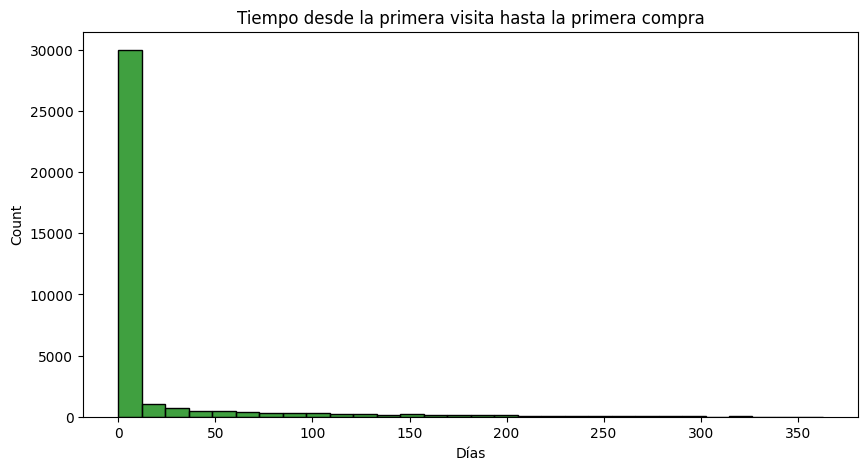

In [38]:
# Graficamos el tiempo de conversión.
plt.figure(figsize=(10,5))
sns.histplot(conversion['days_to_conversion'], bins=30, color='green')
plt.title('Tiempo desde la primera visita hasta la primera compra')
plt.xlabel('Días')
plt.show()

In [39]:
conversion['days_to_conversion'].describe()

count    35886.000000
mean        15.578276
std         45.327116
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max        363.000000
Name: days_to_conversion, dtype: float64

El tiempo de conversión promedio por usuario es de 15 días. Esto puede deverse a que los usuarios no tengan claro de hacer la compra, o que se tomen el tiempo desde el momento de la primera visita para para hacer compras de un espectáculo en específico.

### ¿Cuántos pedidos hacen durante un período de tiempo dado?

In [40]:
# Como queremos saber el número de pedidos por usuario en un período de tiempo, agrupamos por buy_ts y contamos por usuario.
orders_per_day = orders.groupby(orders['buy_ts'].dt.date)['uid'].count().reset_index()
print(orders_per_day.head())

       buy_ts  uid
0  2017-06-01   96
1  2017-06-02  111
2  2017-06-03   67
3  2017-06-04   66
4  2017-06-05  161


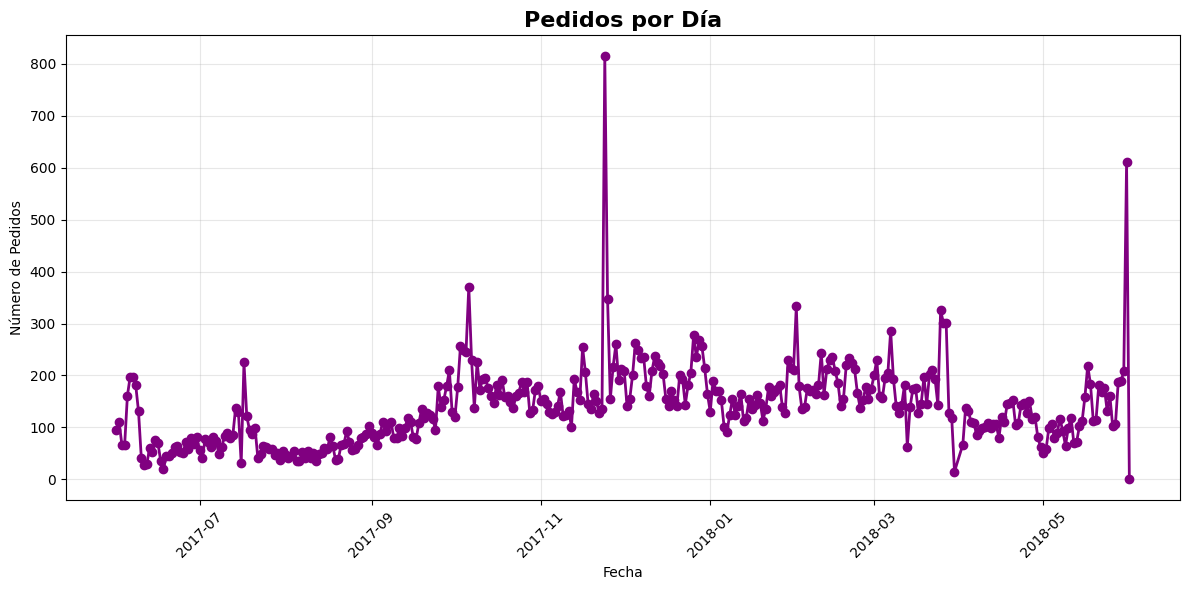

In [41]:
# Graficamos el número de pedidos por día
plt.figure(figsize=(12, 6))
plt.plot(orders_per_day['buy_ts'], orders_per_day['uid'], marker='o', linewidth=2, color='purple')
plt.title('Pedidos por Día', fontsize=16, fontweight='bold')
plt.xlabel('Fecha')
plt.ylabel('Número de Pedidos')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Como no es muy claro en el gráfico, vamos a sacar el promedio de las ordenes por día.

In [42]:
orders_per_day.describe()

,uid
count,364.000000
mean,138.502747
std,76.858480
min,1.000000
25%,82.750000
50%,136.000000
75%,177.000000
max,814.000000


Teniendo en cuenta que el promedio de pedidos que se realizan por día es de 138. Sin embargo, viendo nuestra desviación estandar, podemos decir que nuestra variabilidad es muy alta, ya que el mínimo de pedidos recibidos es de 1 y el máximo de 814, así que tocaría entrar a ver cuáles son esos eventos que generan picos tan altos en ventas para poder determinar qué los produce. Adicionalmente, podemos entrar a revisar si es un tema de estacionalidad, es decir, que se aumenten las ordenes de compra los fines de semana, por ejemplo.

### ¿Cuál es el tamaño promedio de compra?

In [43]:
aov = orders.groupby('uid')['revenue'].mean().reset_index()
print(aov.head())

                    uid  revenue
0  10000837700716403746   2.2000
1  10000997030965831953   1.8300
2  10001199569370567060   0.5000
3  10002243978166172255   4.3525
4  10003351403065971701   6.7200


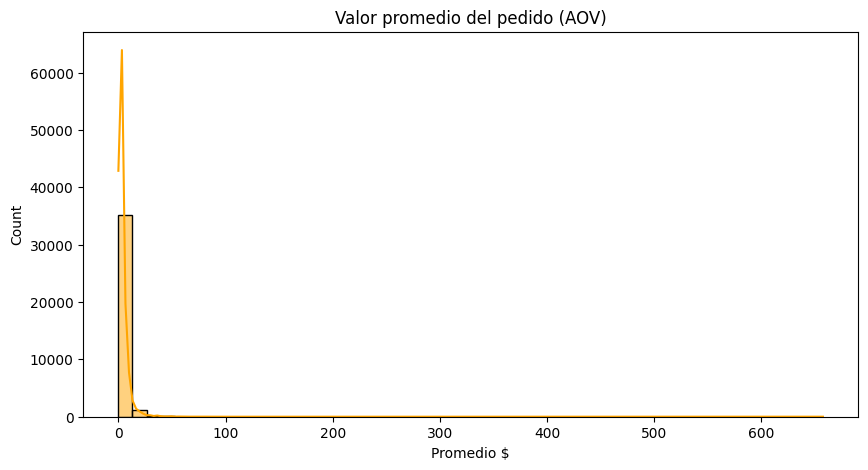

In [44]:
# Graficamos el valor promedio del pedido.
plt.figure(figsize=(10,5))
sns.histplot(aov['revenue'], bins=50, kde=True, color='orange')
plt.title('Valor promedio del pedido (AOV)')
plt.xlabel('Promedio $')
plt.show()

In [45]:
aov['revenue'].describe()

count    36523.000000
mean         4.093093
std          7.671220
min          0.000000
25%          1.285000
50%          2.490000
75%          4.890000
max        657.466250
Name: revenue, dtype: float64

De los 36.523 usuarios que realizaron compras, su aporte promedio a los ingresos de la plataforma es de 4,09 dólaress. Sin embargo, la variabilidad es muy alta ya que hay usuarios que gastan mucho más que otros. Esto puede indicarnos que hay clientes que gastan muchísimo más que lo que consumen los clientes que gastan más en eventos. Para ello, podríamos entrar a averiguar qué características tiene este tipo de cliente "premium" y de qué fuentes están viniendo.

Asimismo, podemos entrar a crear estrategias centradas en ofrecer servicios complementarios, programas de fidelización y ofertas especializadas para los usuarios que gastan menos de 4,89 dólares.

In [46]:
# Primero, unimos las órdenes con las visitas para tener la fuente y el dispositivo de cada usuario
orders_visits = orders.merge(visits[['uid', 'source_id', 'device']], on='uid', how='left')

In [47]:
# Queremos saber cual es nuestro AOV por fuente de marketing, así que agrupamos por source.
aov_by_source = orders_visits.groupby('source_id')['revenue'].mean().reset_index()
aov_by_source.columns = ['source_id', 'aov']

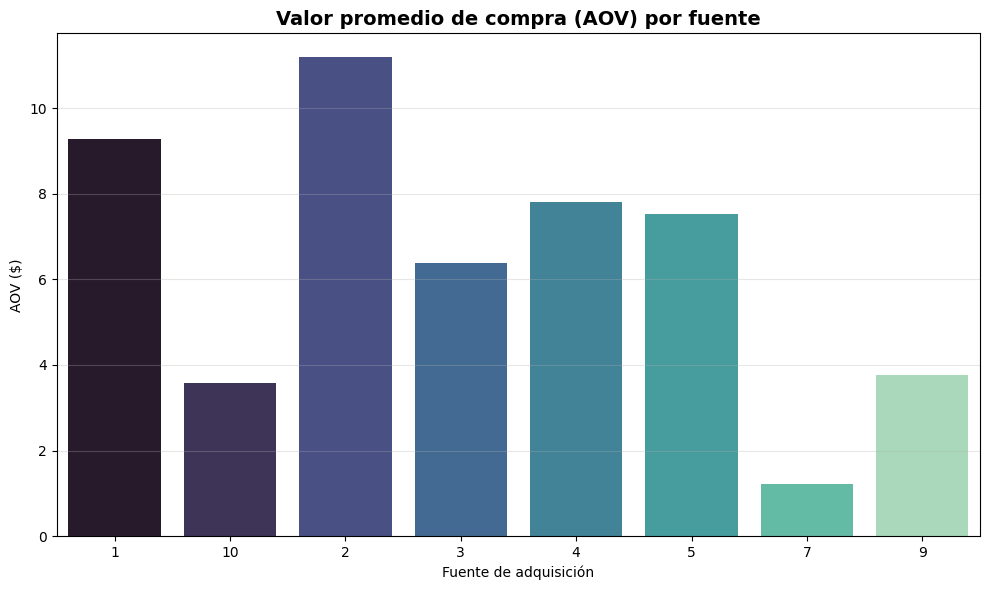

In [48]:
# Graficamos por fuente de marketing
plt.figure(figsize=(10,6))
sns.barplot(data=aov_by_source, x='source_id', y='aov', palette='mako')
plt.title('Valor promedio de compra (AOV) por fuente', fontsize=14, fontweight='bold')
plt.xlabel('Fuente de adquisición')
plt.ylabel('AOV ($)')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [49]:
print(aov_by_source.sort_values('aov', ascending=False).head())

  source_id        aov
2         2  11.187580
0         1   9.268292
4         4   7.806346
5         5   7.515317
3         3   6.383574


El tamaño promedio de la compra es más alto en la fuente 2 y 1 de nuestro medio de mercadeo. Sería interesante evaluar qué hace que los usuarios de que provienten de estas dos fuentes gasten más que las otras, considerando que hay fuentes como la 6, 7 y 8 que su aporte es bajo o nulo.

In [50]:
# Ahora, queremos saber nuestro AOV por dispositivo, así que agrupamos por device.
aov_by_device = orders_visits.groupby('device')['revenue'].mean().reset_index()
aov_by_device.columns = ['device', 'aov']

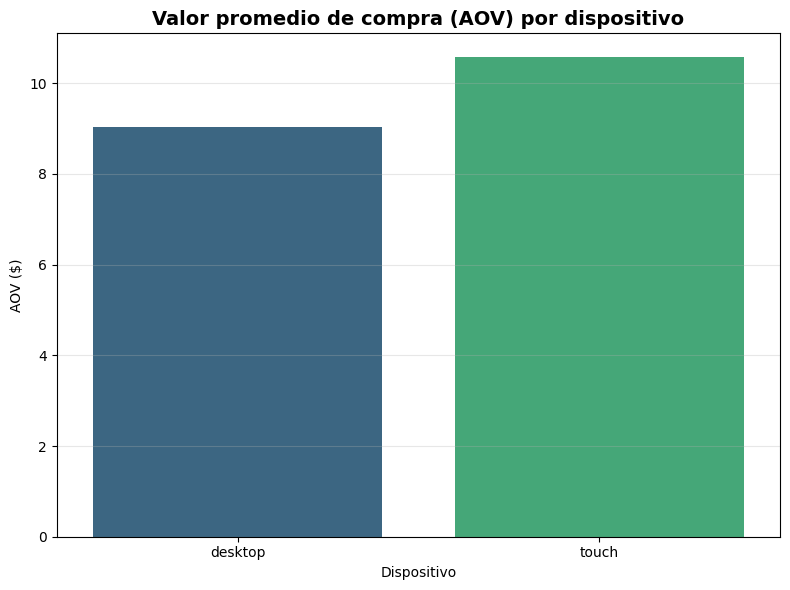

In [51]:
plt.figure(figsize=(8,6))
sns.barplot(data=aov_by_device, x='device', y='aov', palette='viridis')
plt.title('Valor promedio de compra (AOV) por dispositivo', fontsize=14, fontweight='bold')
plt.xlabel('Dispositivo')
plt.ylabel('AOV ($)')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [52]:
print(aov_by_device)

    device        aov
0  desktop   9.035501
1    touch  10.570421


Es interesante ver que, a pesar de que los usuarios que hacen uso de los dispositivos touch hacen compras más grandes (AOV mayor), en promedio, no es muy diferente a aquellos que usan los dispositivos desktop.

### ¿Cuánto dinero traen? (LTV)

In [53]:
# Reducimos las tablas a una fila por usuario.
first_visit_s = visits.groupby('uid', as_index=False).agg({'source_id': 'first'})
user_revenue = orders.groupby('uid', as_index=False).agg({'revenue': 'sum'})

In [54]:
# Unimos las dos tablas reducidas
fv_rev = first_visit_s.merge(user_revenue, on='uid', how='left')
fv_rev.head()

,uid,source_id,revenue
0,10000171586432207426,3,NaN
1,10000344846682484395,3,NaN
2,1000036778515242839,3,NaN
3,10000460875579931334,4,NaN
4,10000558740593440652,4,NaN


In [55]:
costs_ag = costs.groupby('source_id')['costs'].sum()

In [56]:
costs_ag.head()

source_id
1      20833.27
10      5822.49
2      42806.04
3     141321.63
4      61073.60
Name: costs, dtype: float64

In [57]:
# Unimos las dos tablas reducidas
fv_rev = first_visit_s.merge(user_revenue, on='uid', how='left')
fv_rev = fv_rev.merge(costs_ag, on='source_id', how='left')

In [58]:
fv_rev.head()

,uid,source_id,revenue,costs
0,10000171586432207426,3,NaN,141321.63
1,10000344846682484395,3,NaN,141321.63
2,1000036778515242839,3,NaN,141321.63
3,10000460875579931334,4,NaN,61073.60
4,10000558740593440652,4,NaN,61073.60


In [59]:
# Buscamos nuestro LTV por fuente de marketing
ltv_by_source = fv_rev.groupby('source_id', as_index=False).agg({'revenue': 'sum', 'uid': 'nunique'})
ltv_by_source['ltv'] = ltv_by_source['revenue'] / ltv_by_source['uid']
ltv_by_source.head()

,source_id,revenue,uid,ltv
0,1,30537.37,9283,3.289601
1,10,4611.73,6194,0.744548
2,2,47265.19,16401,2.881848
3,3,53061.62,59791,0.887452
4,4,55601.15,65234,0.852334


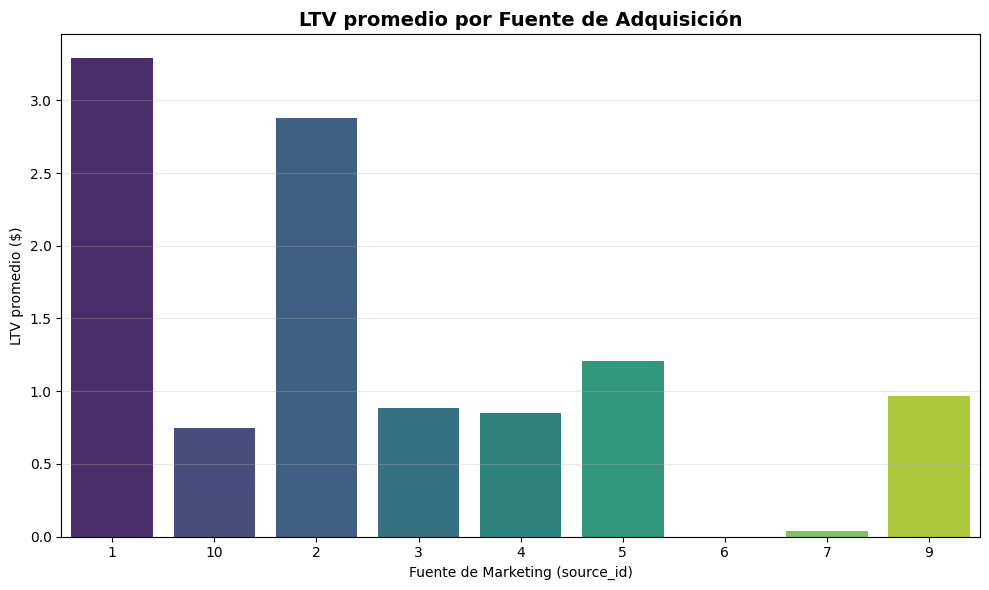

In [60]:
plt.figure(figsize=(10,6))
sns.barplot(data=ltv_by_source, x='source_id', y='ltv', palette='viridis')
plt.title('LTV promedio por Fuente de Adquisición', fontsize=14, fontweight='bold')
plt.xlabel('Fuente de Marketing (source_id)')
plt.ylabel('LTV promedio ($)')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Viendo nuestro gráfico, nos podemos dar cuenta que las fuentes de marketing a través de las cuales los usuarios generan mayores ingresos a Showz, son las 1 y 2. En estos casos, es importane determinar qué puede hacer que los clientes compren más cuando llegan por estos medios y qué tipo de clientes son.

In [61]:
# Ahora, agrupamos por dispositivo
first_visits_dv = visits.groupby('uid', as_index=False).agg({'device': 'first'})

In [62]:
# Unimos las dos tablas reducidas
fv_revd = first_visits_dv.merge(user_revenue, on='uid', how='left')
fv_revd.head()

,uid,device,revenue
0,10000171586432207426,desktop,NaN
1,10000344846682484395,desktop,NaN
2,1000036778515242839,desktop,NaN
3,10000460875579931334,touch,NaN
4,10000558740593440652,desktop,NaN


In [63]:
# Luego, calculamos nuestro LTV por dispositivo.
ltv_by_device = (fv_revd.groupby('device')['revenue'].sum() / visits.groupby('device')['uid'].nunique()).reset_index()
ltv_by_device.columns = ['device', 'ltv']
print(ltv_by_device)

    device       ltv
0  desktop  1.392557
1    touch  0.640047


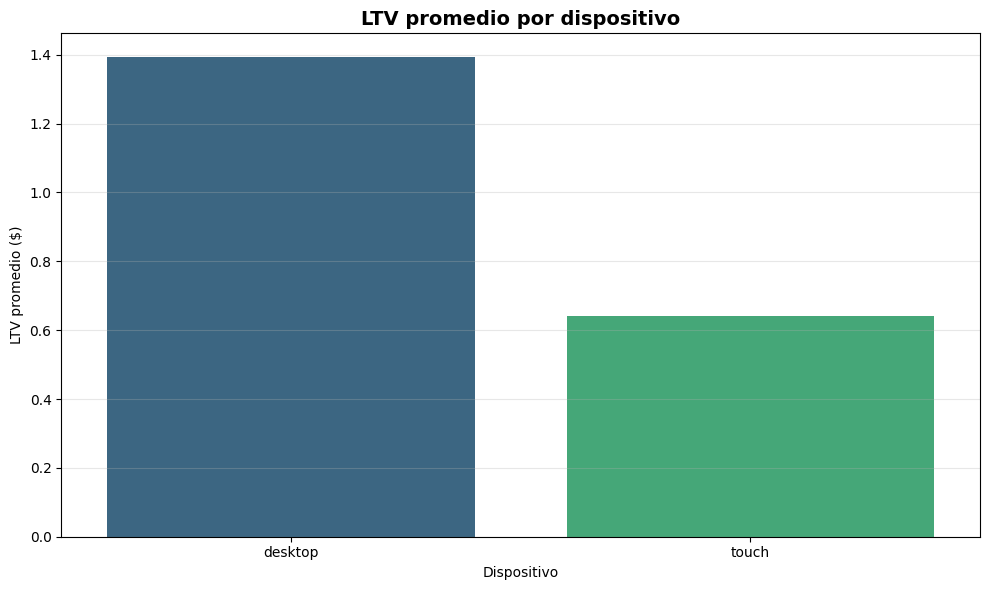

In [64]:
# Usar el nombre correcto de variable
plt.figure(figsize=(10,6))
sns.barplot(data=ltv_by_device, x='device', y='ltv', palette='viridis')
plt.title('LTV promedio por dispositivo', fontsize=14, fontweight='bold')
plt.xlabel('Dispositivo')
plt.ylabel('LTV promedio ($)')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Por algún motivo, los clientes que generan mayores ingresos, son aquellos que usan dispositivos de escritorio. De hecho, casi que duplica la cantidad de ingresos por dispositivos touch.

Una recomendación para el departamento de desarrollo, sería revisar si la versión movil de la página no está funcionando bien o no es muy amigable, ya que la gente no adquiere casi entradas por este medio y hoy en día la gente tiende a usar más sus dispositivos moviles que los de escritorio y podría estar perdiendo un gran mercado por este medio.

### MARKETING

### ¿Cuánto dinero se gastó?

In [65]:
# Sumo primero mis costos totales.
total_cost = costs['costs'].sum()
total_cost

329131.62

In [66]:
# Luego, sumo los costos agrupando por fuente de anuncios, para saber cuánto cuesta cada uno al negocio.
cost_by_source = costs.groupby('source_id')['costs'].sum().reset_index()
cost_by_source

,source_id,costs
0,1,20833.27
1,10,5822.49
2,2,42806.04
3,3,141321.63
4,4,61073.60
5,5,51757.10
6,9,5517.49


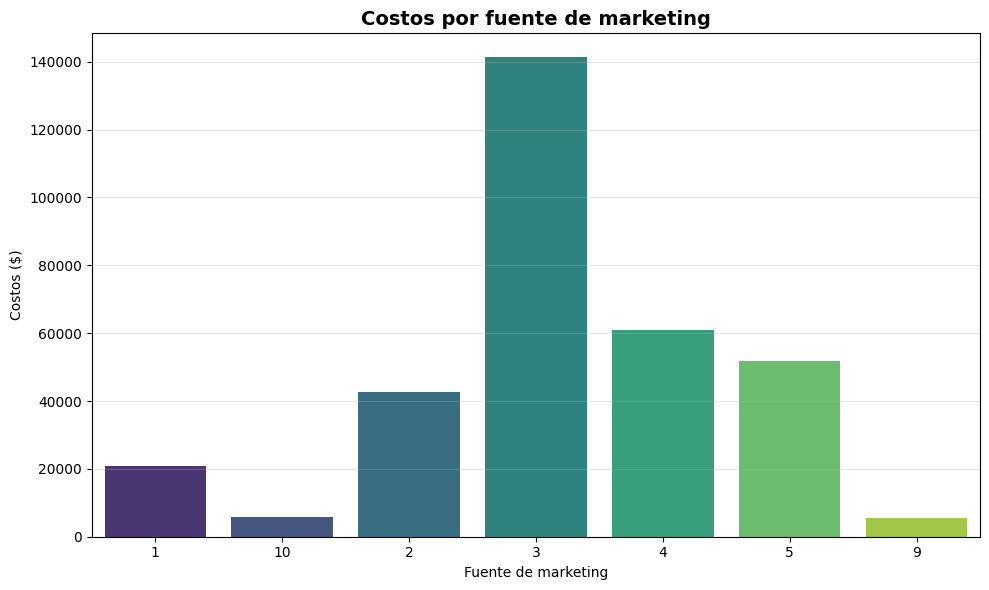

In [67]:
# Usar el nombre correcto de variable
plt.figure(figsize=(10,6))
sns.barplot(data=cost_by_source, x='source_id', y='costs', palette='viridis')
plt.title('Costos por fuente de marketing', fontsize=14, fontweight='bold')
plt.xlabel('Fuente de marketing')
plt.ylabel('Costos ($)')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Revisando el comportamiento de nuestros costos, podemos ver que la fuente que más cuesta es la 3. Para ello, tendríamos que entrar a analizar qué tanto nos cuesta por este medio atraer a nuestros clientes, ya que puede que estemos invirtiendo excesivamente y no nos esté dando un retorno esperado. Esto lo veremos en nuestro análisis CAC y ROMI.

In [68]:
# Ahora, queremos saber cuál es el costo por dispositivo
visits_ag = visits.groupby('source_id').agg({'device': 'first'}).reset_index()
visits_costs = visits_ag.merge(costs.groupby('source_id')['costs'].sum(), on='source_id', how='left')
# Agrupar por dispositivo y sumar los costos
costs_by_device = visits_costs.groupby('device')['costs'].sum().reset_index()
costs_by_device

,device,costs
0,desktop,262540.53
1,touch,66591.09


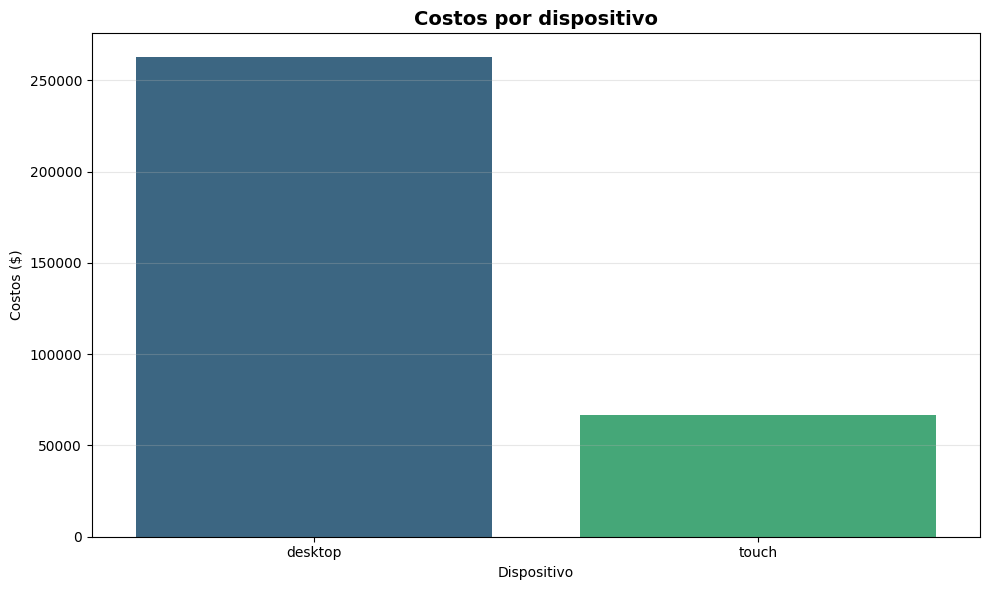

In [69]:
plt.figure(figsize=(10,6))
sns.barplot(data=costs_by_device, x='device', y='costs', palette='viridis')
plt.title('Costos por dispositivo', fontsize=14, fontweight='bold')
plt.xlabel('Dispositivo')
plt.ylabel('Costos ($)')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Asimismo, revisando nuestro gráfico de costos por dispositivos, vemos que el que más nos genera costos es el desktop. Cuando hagamos nuestro análisis CAC revisaremos qué tanto nos cuesta adquirir un cliente que llega por ese medio.

In [70]:
# Y ahora, sumo mis costos por fecha para saber mis gastos a lo largo del tiempo.
cost_over_time = costs.groupby('dt')['costs'].sum().reset_index()
cost_over_time.head()

,dt,costs
0,2017-06-01,735.26
1,2017-06-02,721.19
2,2017-06-03,450.85
3,2017-06-04,761.16
4,2017-06-05,821.44


### ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?

In [71]:
# Como queremos saber por qué tipo de anuncio llegó cada cliente, agrupamos por fuente, contando nuestros usuarios únicos.
user_by_source = visits.groupby('source_id')['uid'].nunique().reset_index()
# Unimos los DataFrames por source_id
cac_s = cost_by_source.merge(user_by_source, on='source_id', how='left')
cac_s.head()

,source_id,costs,uid
0,1,20833.27,17960
1,10,5822.49,7208
2,2,42806.04,24152
3,3,141321.63,67284
4,4,61073.60,75080


In [72]:
# Ahora queremos saber cuánto nos costó adquirir cada cliente.
cac_s['cac'] = cac_s['costs'] / cac_s['uid']
cac_s.sort_values('cac', ascending=False)

,source_id,costs,uid,cac
3,3,141321.63,67284,2.100375
2,2,42806.04,24152,1.772360
0,1,20833.27,17960,1.159982
5,5,51757.10,50921,1.016420
4,4,61073.60,75080,0.813447
1,10,5822.49,7208,0.807782
6,9,5517.49,8504,0.648811


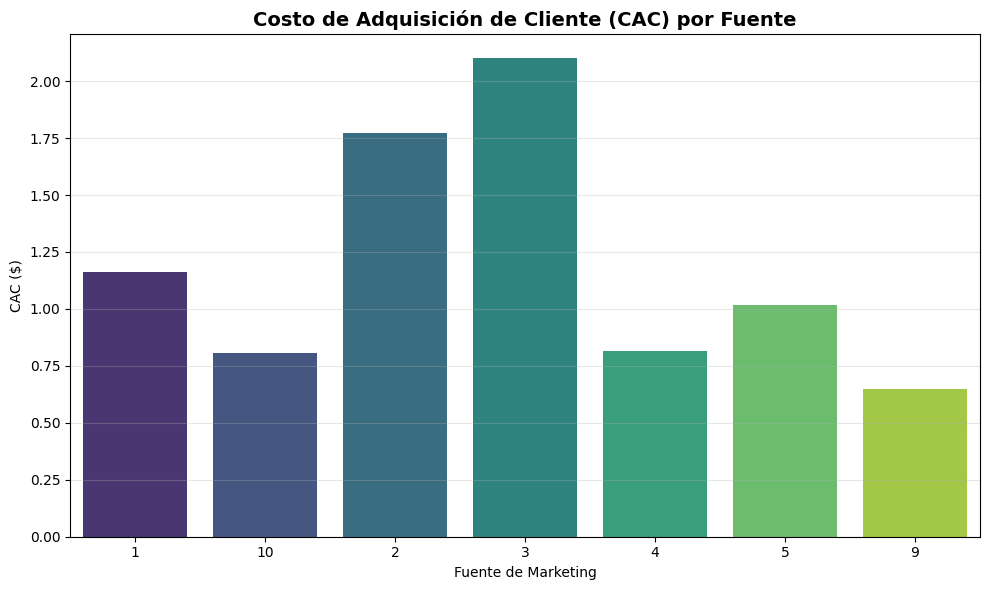

In [73]:
plt.figure(figsize=(10,6))
sns.barplot(data=cac_s, x='source_id', y='cac', palette='viridis')
plt.title('Costo de Adquisición de Cliente (CAC) por Fuente', fontsize=14, fontweight='bold')
plt.xlabel('Fuente de Marketing')
plt.ylabel('CAC ($)')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Definitivamente, el medio por donde más nos cuesta adquirir a nuestros clientes es por el 3. Como pudimos darnos cuenta en nuestro LTV, es de los medios por el cual nos aporta menos ingresos los clientes.

Recomendaría, en ese caso, invertir menos (o dejar de invertir) en esta fuente, ya que se vuelve demasiado costoso adquirir un cliente que no nos va a representar mayores ingresos.

A diferencia de las fuentes 1 y 2 que, a pesar de que el CAC es alto, nos representa la mayor fuente de ingresos de la empresa.

In [74]:
# Como queremos saber por qué tipo de anuncio llegó cada cliente, agrupamos por fuente, contando nuestros usuarios únicos.
user_by_device = visits.groupby('device')['uid'].nunique().reset_index()
# Unimos los DataFrames por device
cac_d = costs_by_device.merge(user_by_device, on='device', how='left')
cac_d.head()

,device,costs,uid
0,desktop,262540.53,150671
1,touch,66591.09,63057


In [75]:
# Ahora queremos saber cuánto nos costó adquirir cada cliente.
cac_d['cac'] = cac_s['costs'] / cac_s['uid']
cac_d.sort_values('cac', ascending=False)

,device,costs,uid,cac
0,desktop,262540.53,150671,1.159982
1,touch,66591.09,63057,0.807782


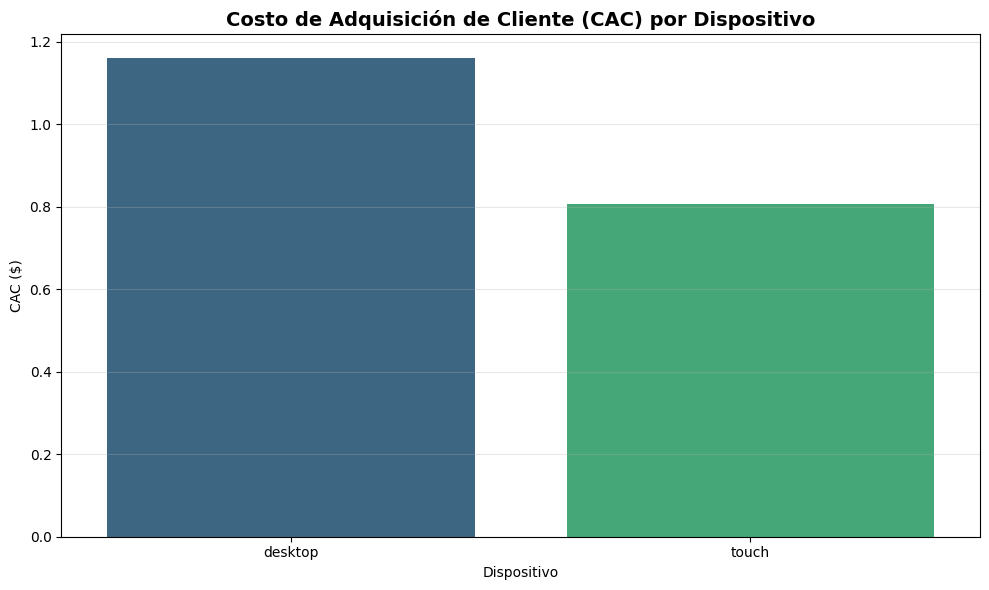

In [76]:
plt.figure(figsize=(10,6))
sns.barplot(data=cac_d, x='device', y='cac', palette='viridis')
plt.title('Costo de Adquisición de Cliente (CAC) por Dispositivo', fontsize=14, fontweight='bold')
plt.xlabel('Dispositivo')
plt.ylabel('CAC ($)')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Los clientes que nos generan más costos, utilizan los dispositivos de escritorio. Debemos entrar a revisar si es por el tipo de fuentes de mercadeo por el cual llegan o si se debe a una situación como tal de navegabilidad de la página en versión escritorio que movil.

###  ¿Cuán rentables eran las inversiones? (ROMI)

In [77]:
# Ahora, agrupamos nuestras fuentes de anuncios y sumamos los ingresos que aportan cada una.
revenue_by_source = fv_rev.groupby('source_id')['revenue'].sum().reset_index()
revenue_by_source

,source_id,revenue
0,1,30537.37
1,10,4611.73
2,2,47265.19
3,3,53061.62
4,4,55601.15
5,5,53352.23
6,6,0.00
7,7,1.22
8,9,5746.85


In [78]:
cost_rev_source = cost_by_source.merge(revenue_by_source, on='source_id')
cost_rev_source

,source_id,costs,revenue
0,1,20833.27,30537.37
1,10,5822.49,4611.73
2,2,42806.04,47265.19
3,3,141321.63,53061.62
4,4,61073.60,55601.15
5,5,51757.10,53352.23
6,9,5517.49,5746.85


In [79]:
# Finalmente, sacamos nuestro retorno de la inversión por marketing
cost_rev_source['romi'] = (cost_rev_source['revenue'] - cost_rev_source['costs']) / cost_rev_source['costs']
cost_rev_source

,source_id,costs,revenue,romi
0,1,20833.27,30537.37,0.465798
1,10,5822.49,4611.73,-0.207945
2,2,42806.04,47265.19,0.104171
3,3,141321.63,53061.62,-0.624533
4,4,61073.60,55601.15,-0.089604
5,5,51757.10,53352.23,0.030820
6,9,5517.49,5746.85,0.041570


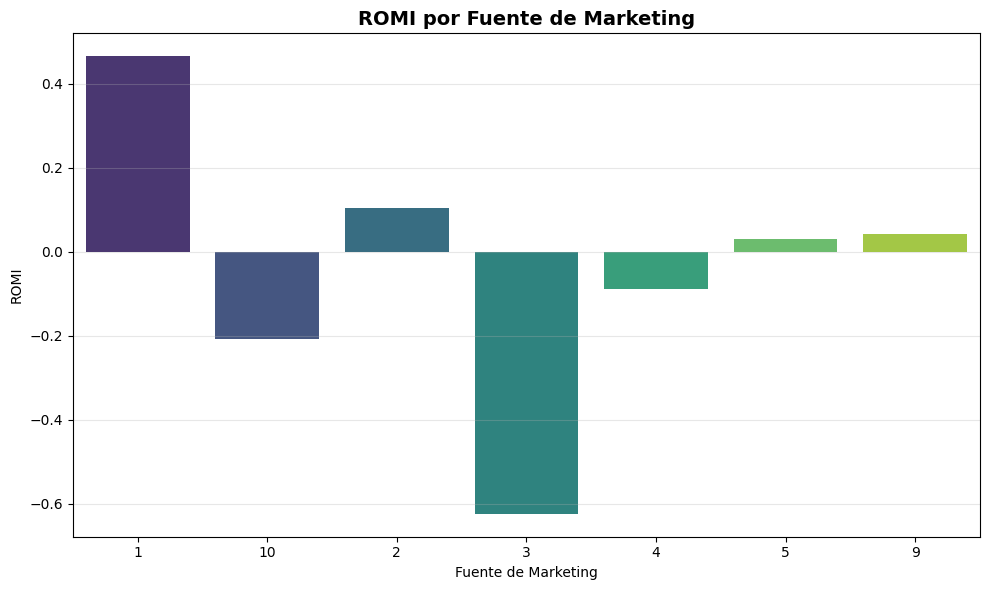

In [80]:
plt.figure(figsize=(10,6))
sns.barplot(data=cost_rev_source, x='source_id', y='romi', palette='viridis')
plt.title('ROMI por Fuente de Marketing', fontsize=14, fontweight='bold')
plt.xlabel('Fuente de Marketing')
plt.ylabel('ROMI')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Mirando los resultados, nos dicen sobre la efectividad de cada fuente de marketing:

La fuente más rentable temina siendo la 1 a pesar de que la ROMI la 2 no nos da menor a 1. Esto quiere decir que es la fuente más valiosa y es donde deben ir todos nuestros esfuerzos de marketing para conseguir más clientes. 

Adicionalmente, podemos ver cómo podemos cambiar nuestra estrategia para elevar el ingreso por cliente cuando lo adquirimos por otras fuentes que dan retornos, como son: el 2, 4, 5 y 9, lo que nos ayuda a diversificar la inversion y obtener clientes de fuentes más variadas.

Por otra parte, confirmamos lo que veníamos viendo en nuestro costo por adquisición de cliente a través de la fuente 3, no es en absoluto rentable y nos está saliendo demasiado costoso adquirir un solo cliente que no retorna lo que se espera. Del mismo modo, aunque en menor porporción, con la fuente 10.

Finalmente, en nuestra fuente 7 no hay ingresos registrados para esta fuente. Esto puede deberse a que sus costos sean 0 (como suele ocurrir en fuentes orgánicas), lo que no nos ayuda a identificar si llega una cantidad significativa por este medio, pero sabríamos que no tendría costo su adquisición.

## Paso 3. Escribe una conclusión: aconseja a los expertos de marketing cuánto dinero invertir y dónde

Durante todo nuestro análisis de proyecto pudimos enfocarnos en diferentes métricas que dieron luz sobre el comportamiento de las fuentes de mercadeo en la adquisición de clientes y cómo estos aportan a los ingresos generales de la compañía.

En primera instancia, nos centramos en el comportamiento de usuarios dentro de la página de Showz, el cual nos mostró que hubo un gran aumento o interaccione con la página desde el mes de agosto (donde empezó a aumentar significativamente) hasta el mes de abril (donde se empezó a estabilizar). El pico más alto registrado de clientes fue en el mes de noviembre.

Se recomienda entrar a investigar por qué aumentó tanto el volumen de usuarios en este período de tiempo y si es un tema estacional, o se debe a las campañas de mercadeo realizadas o a que el tipo de espectáculos ofrecido es más atractivo.

Encontramos también que el valor promedio de compra (AOV) de los clientes es más alto en las fuentes de marketing 1 y 2, y menos fuertes en el 7 y 10. Y que, estos usuarios que tienen un mayor valor de compra utilizan más la versión de desktop de la página que el touch, a pesar de que están muy cercanos en valor.

En ese sentido, la fuente de marketing por la cual aportan mayormente los ingresos (LTV) a la compañía los usuarios es por la 1 y 2, constatando lo que vimos en el análisis por fuente de nuestro AOV. Sin embargo, al analizar el dispositivo por el cual llegaban estos usuarios, nos dimos cuenta que los que ‘mas aportan’ son los de desktop, duplicando casi su cantidad. 

Para ello, se recomienda revisar si esto se debe a algún tipo de navegabilidad que hace que los compradores que aportan más ingresos lleguen por este medio.

Adicionalmente, en nuestra evaluación de costos, nos dimos cuenta que la fuente más costosa es la 3, algo que reafirmamos en nuestro CAC por fuente. Lo preocupante, en este caso, es que retorno (ROMI) que nos da esta fuente es negativo (-0.6245), lo que nos indica que estamos pagando demasiado por adquirir un cliente que no nos está generando los ingresos esperados. En este caso, se recomienda no seguir invirtiendo o redireccionar la inversión hacia otras fuentes que sean más rentables, como la 1 o la 2.